# 06 Classification dengan KNN (K Nearest Neighbours)
- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karaktersitik dengan sejumlah tetangga terdekat.
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

## Sample Data

In [1]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


## Visualisasi data

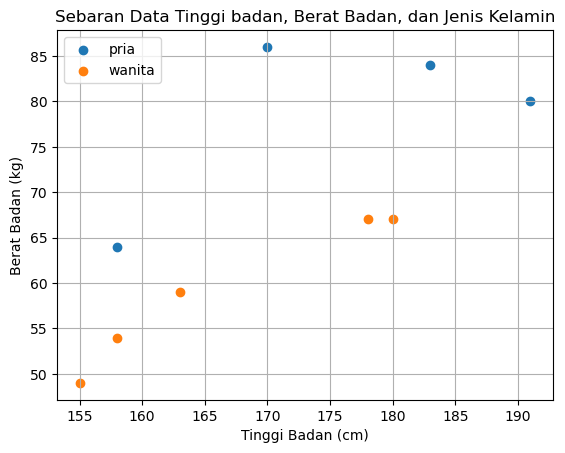

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left') # parameter loc untuk mengatur location dari legend/keterangan 
plt.title('Sebaran Data Tinggi badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

# Classification dengan KNN

## Preprocessing Dataset

In [7]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train} ')

# x_train nya berisi nilai feature
# y_train berisi nilai target

# Cara kerja mesin pintar ini:

# Tinggi & Berat ➝ Jadi petunjuk (input)
# Jenis Kelamin ➝ Jadi jawaban (output)

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita'] 


In [9]:
# Konversi nilai y_train string menjadi numerik biner

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train : {y_train}')

y_train : [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


#### Karna y_train di format menjadi array 2 dimensi kita harus rubah menjadi arrray 1 dimensi

In [14]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [0 0 0 0 1 1 1 1 1]


## Trainin KNN Classification Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediksi Jenis kelamin dengan data baru

In [24]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

#### Sekumpulan nilai feature yang bisa di gunakan harus berformat numpy array dengan ukuran 2 dimensi, dimana dimensi yang mengatur baris itu akan berkolerasi dengan jumlah data, sedangkan dimensi yang mengatur kolom itu akan berkorelasi dengan nilai featuresnya

In [28]:
y_new = model.predict(X_new)
y_new

array([1])

#### Bisa kita bilang dengan tinggi badan 155 dan berat badan 70 di prediksi memiliki jenis kelamin 1. 1 itu wanita

In [30]:
lb.inverse_transform(y_new)

array([1])

## Visualisasi Nearest Neighbors

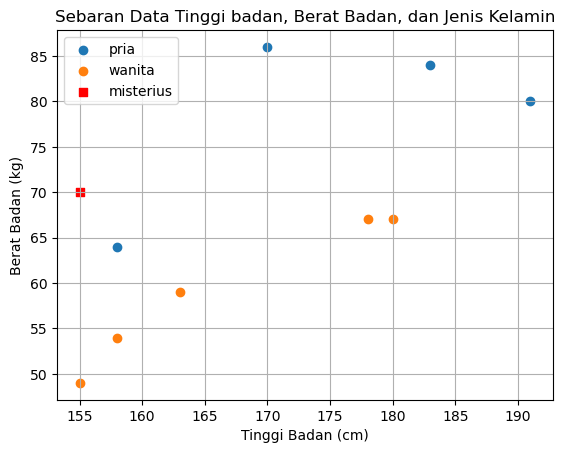

In [31]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left') # parameter loc untuk mengatur location dari legend/keterangan 
plt.title('Sebaran Data Tinggi badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Kalkulasi Distance (Euclidean Distance)

#### Untuk mengukur jarak antara 1 data point dengan data point lainnya

#### distance = akar (t1 - t2)akar 2 + (b1 - b2) akar 2

In [32]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [33]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [34]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [36]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak']) 
# urutin datanya dengan ascending berarti dari nilai terkecil hingga terbesar

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


## Evaluasi KNN Classification Model

### Testing Set

In [47]:
X_test= np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 0 0]


### Prediksi terhadap testing set

In [49]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

## Accuracy

### Accuracy is the propotion of test instances that were classified correctly.

### Accucary = tp + tn
             ---------------
            tp + tn + Fp + Fn

In [50]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuarcy: {acc}')

Accuarcy: 0.25


## Precission

#### Precission is the propotion of test instances that were predicted to be positive that are truly positive

#### precission = tp
            -------
            tp + fp

In [54]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission : {prec}')

Precission : 0.0


## Recall

#### Recall is the proportion of truly positive test instances that were predicted to be positive.

#### recall = tp
        ------
        tp + fn

In [56]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall : {rec}')

Recall : 0.0


C:\Users\Vince\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## F1 Score

#### The F1 score is the harmonic mean of precision and recall.

#### F1 = 2 X precission X recall
        ------------------------
        precission + recal

In [57]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'f1_score = {f1}')

f1_score = 0.0


## Classification Report

In [59]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(f'classification report =\n{cr}')

classification report =
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



C:\Users\Vince\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vince\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vince\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Precision → Seberapa banyak prediksi benar dibandingkan semua yang diprediksi sebagai kelas itu.
#### Recall → Seberapa banyak prediksi benar dibandingkan semua yang seharusnya benar.
#### F1-score → Gabungan Precision & Recall untuk keseimbangan.
#### Support → Jumlah data sebenarnya di setiap kelas.
---
#### Akurasi = 0.25 (25%) → Dari 4 data uji, hanya 1 prediksi yang benar.
#### Model gagal mengenali pria (1) sama sekali, karena tidak ada contoh pria di y_test.
#### Macro Avg → Rata-rata semua kelas (kurang akurat kalau data tidak seimbang).
#### Weighted Avg → Rata-rata berbobot sesuai jumlah sampel di setiap kelas.

## Mathews Correlation Coefficient (MCC)
- MCC is an alternative to the F1 score for measuring the performance of binary classifiers
- A perfect classisfier's MCC is 1.
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1.


#### MCC =             tp x tn x fp x fn 
        -------------------------------------------
        akar (tp + fp) x (tp + fn) x (tn + fp) x (tn + fn)

In [1]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

NameError: name 'y_test' is not defined